<a href="https://colab.research.google.com/github/Gregory-lab-eng/python_Vistula/blob/main/Skladowe_harmoniczne_Strakhov_75209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ćwiczenie 1: Syntezator kota miauczącego

In [4]:
import sys
import os

# Check if thinkdsp is already in sys.path or can be imported
try:
    import thinkdsp
except ModuleNotFoundError:
    # If not, try to install it by cloning the repo and adding to path
    print("thinkdsp not found, attempting to install from GitHub...")
    # Check if the directory already exists from a previous run to avoid cloning again
    if not os.path.exists('ThinkDSP'):
        !git clone https://github.com/AllenDowney/ThinkDSP.git
    sys.path.insert(0, 'ThinkDSP/code') # Add the 'code' directory to Python path
    try:
        import thinkdsp
        print("thinkdsp installed successfully!")
    except Exception as e:
        print(f"Failed to import thinkdsp after installation attempt: {e}")

thinkdsp not found, attempting to install from GitHub...
Cloning into 'ThinkDSP'...
remote: Enumerating objects: 2684, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 2684 (delta 1), reused 9 (delta 1), pack-reused 2666 (from 1)
Receiving objects: 100% (2684/2684), 254.48 MiB | 29.89 MiB/s, done.
Resolving deltas: 100% (1465/1465), done.
thinkdsp installed successfully!


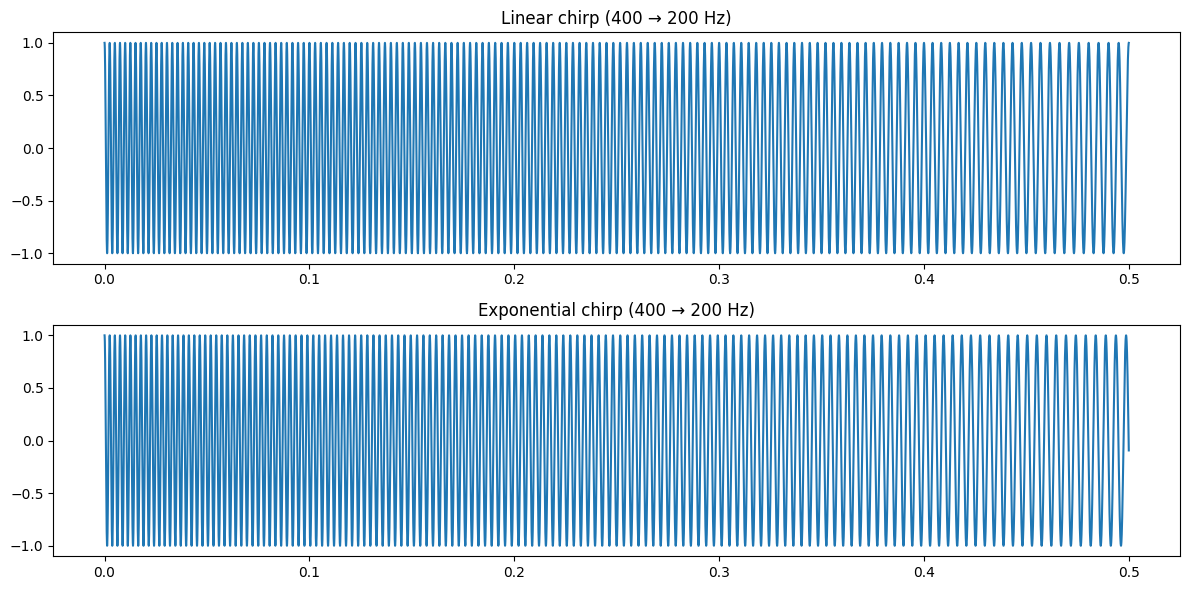

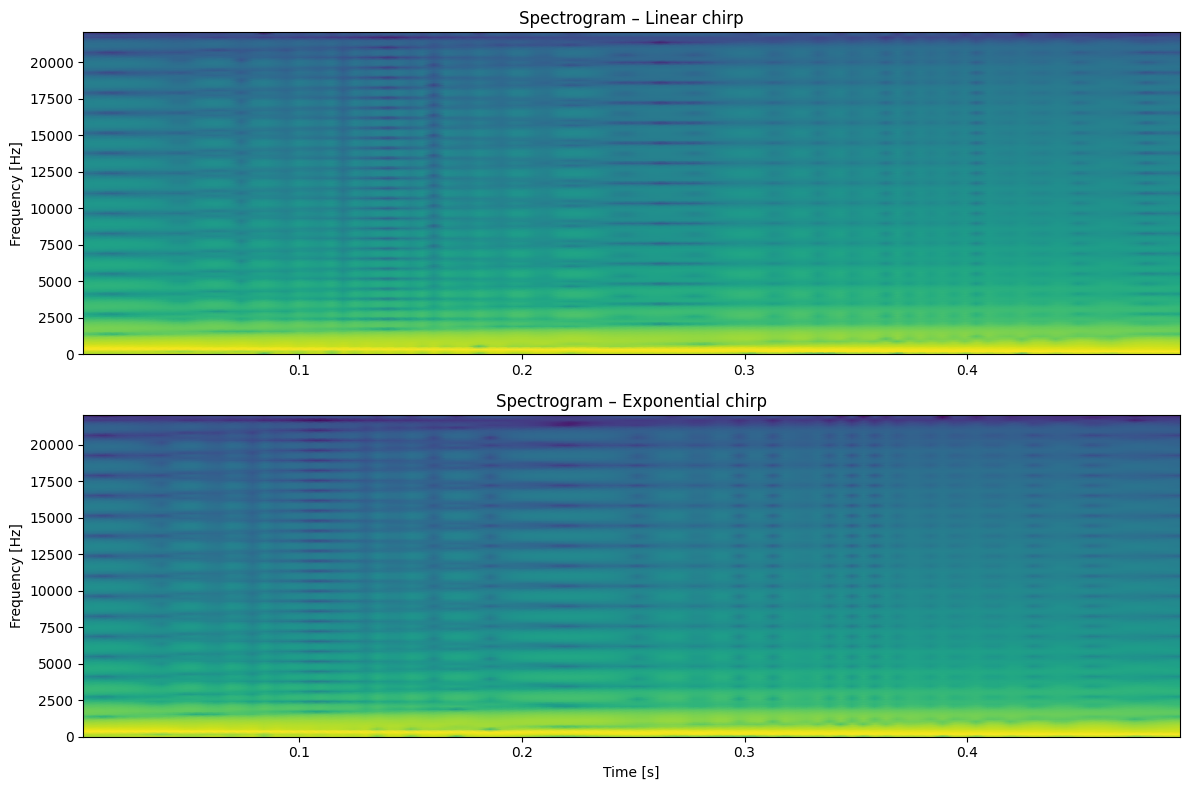

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp, spectrogram

fs = 44100
duration = 0.5
t = np.linspace(0, duration, int(fs*duration), endpoint=False)

# --- CHIRPY ---
linear = chirp(t, f0=400, f1=200, t1=duration, method='linear')
expo   = chirp(t, f0=400, f1=200, t1=duration, method='logarithmic')

# --- KONCERT KOTÓW ---
silence = np.zeros(int(0.2 * fs))
concert = np.concatenate([expo, silence, expo, silence, expo])

# --- WAVEFORMY ---
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.title("Linear chirp (400 → 200 Hz)")
plt.plot(t, linear)

plt.subplot(2,1,2)
plt.title("Exponential chirp (400 → 200 Hz)")
plt.plot(t, expo)
plt.tight_layout()
plt.show()

# --- SPEKTROGRAMY ---
plt.figure(figsize=(12,8))

f, tt, Sxx = spectrogram(linear, fs)
plt.subplot(2,1,1)
plt.title("Spectrogram – Linear chirp")
plt.pcolormesh(tt, f, 10*np.log10(Sxx), shading='gouraud')
plt.ylabel("Frequency [Hz]")

f, tt, Sxx = spectrogram(expo, fs)
plt.subplot(2,1,2)
plt.title("Spectrogram – Exponential chirp")
plt.pcolormesh(tt, f, 10*np.log10(Sxx), shading='gouraud')
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [s]")

plt.tight_layout()
plt.show()


In [11]:
from thinkdsp import Chirp, ExpoChirp
import thinkdsp
import matplotlib.pyplot as plt

duration = 0.5
start = 4000
end = 200

# --- Chirp liniowy ---
linear = Chirp(start=start, end=end)
wave_linear = linear.make_wave(duration=duration, framerate=44100)

# --- Chirp wykładniczy ---
expo = ExpoChirp(start=start, end=end)
wave_expo = expo.make_wave(duration=duration, framerate=44100)

# --- Odsłuch ---
wave_linear.make_audio()



In [13]:
wave_expo.make_audio()

In [10]:
import numpy as np

silence = thinkdsp.Wave(ys=np.zeros(int(0.2 * 44100)), framerate=44100)

concert = wave_expo | silence | wave_expo | silence | wave_expo
concert.make_audio()


Sygnaly brzmią bardzo podopnie, żaden z sygnałów brzmi jako prawdziwy kot.

### Ćwiczenie 2: Detektor kłamstw dla R2-D2

In [15]:
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt

# Parametry
fs = 10000        # próbkowanie 10 kHz
duration = 1.0
t = np.linspace(0, duration, int(fs*duration), endpoint=False)

# --- Sygnał szczery ---
honest = np.sin(2*np.pi*440*t)

# --- Sygnał kłamliwy ---
lie = np.sin(2*np.pi*440*t) + np.sin(2*np.pi*5500*t)

# Odsłuch
Audio(honest, rate=fs)


In [16]:
Audio(lie, rate=fs)

In [18]:
def spectrum(x, fs):
    N = len(x)
    freqs = np.fft.rfftfreq(N, 1/fs)
    mags = np.abs(np.fft.rfft(x))
    return freqs, mags

freq_h, mag_h = spectrum(honest, fs)
freq_l, mag_l = spectrum(lie, fs)


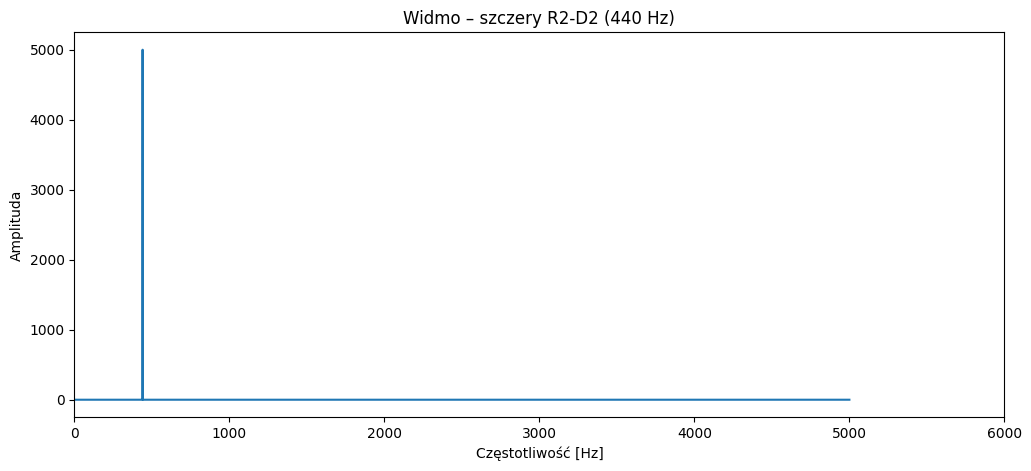

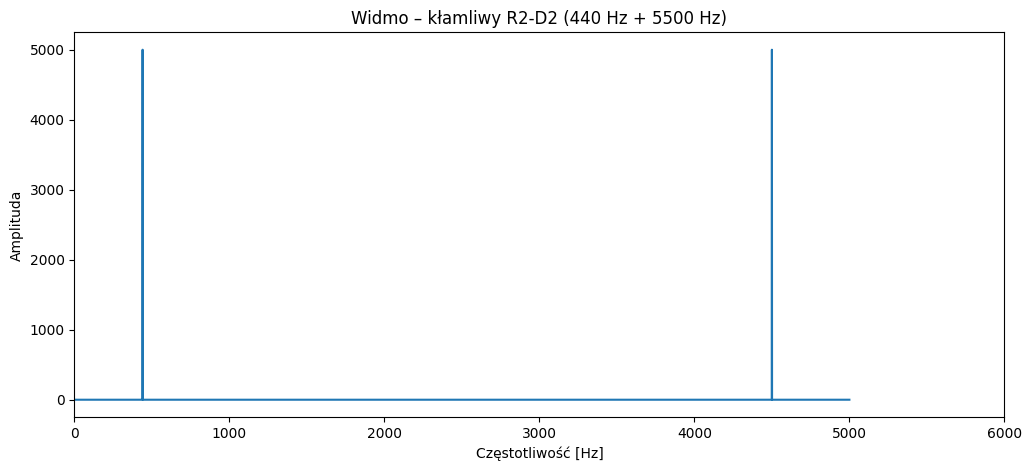

In [21]:
plt.figure(figsize=(12,5))
plt.plot(freq_h, mag_h)
plt.title("Widmo – szczery R2-D2 (440 Hz)")
plt.xlabel("Częstotliwość [Hz]")
plt.ylabel("Amplituda")
plt.xlim(0, 6000)
plt.show()

plt.figure(figsize=(12,5))
plt.plot(freq_l, mag_l)
plt.title("Widmo – kłamliwy R2-D2 (440 Hz + 5500 Hz)")
plt.xlabel("Częstotliwość [Hz]")
plt.ylabel("Amplituda")
plt.xlim(0, 6000)
plt.show()


alias 4500 Hz (zamiast 5500 Hz)

### Ćwiczenie 6: Automatyczny stroiciel gitary leniwego studenta

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

# Parametry
fs = 44100
duration = 0.5
freq = 85
amp = 1.0

t = np.linspace(0, duration, int(fs*duration), endpoint=False)

# część ułamkowa cykli
frac = (freq * t) % 1.0

# fala piłokształtna
signal = 2 * amp * (frac - 0.5)

# Odsłuch
Audio(signal, rate=fs)


In [23]:
# FFT
N = len(signal)
freqs = np.fft.rfftfreq(N, 1/fs)
amps = np.abs(np.fft.rfft(signal))

# pomijamy indeks 0 (składowa stała)
idx = np.argmax(amps[1:]) + 1
freq_measured = freqs[idx]

print("Zmierzona częstotliwość podstawowa:", freq_measured)


Zmierzona częstotliwość podstawowa: 84.0


In [24]:
freq_expected = 82.41
diff = freq_measured - freq_expected
print("Różnica:", diff, "Hz")


Różnica: 1.5900000000000034 Hz


In [25]:
def check_tuning(freq_measured, freq_expected):
    diff = freq_measured - freq_expected
    if diff > 1:
        return "Za wysoko! Poluzuj strunę"
    elif diff < -1:
        return "Za nisko! Dokręć strunę"
    else:
        return "Dobrze nastrojone!"


In [26]:
print(check_tuning(freq_measured, freq_expected))


Za wysoko! Poluzuj strunę


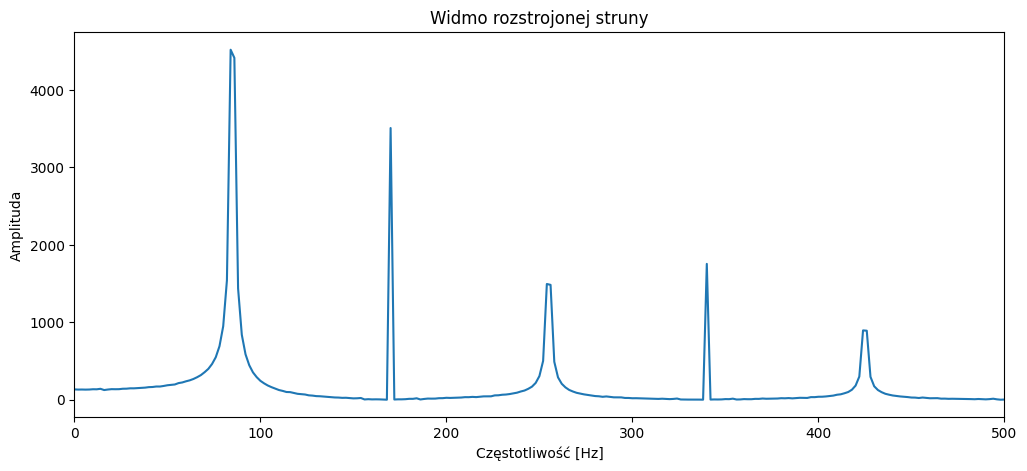

In [27]:
plt.figure(figsize=(12,5))
plt.plot(freqs, amps)
plt.xlim(0, 500)  # tylko niskie częstotliwości
plt.title("Widmo rozstrojonej struny")
plt.xlabel("Częstotliwość [Hz]")
plt.ylabel("Amplituda")
plt.show()
